In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as ran
pi = math.pi
G = 1.18312*(10**-4) #G in dimensions of AU, earth masses, and years.

In [6]:
def nbody(N,t):
    
    mn = np.zeros(N)
    mnxo = np.zeros(N)
    mnyo = np.zeros(N)
    mnvo = np.zeros(N)
    mnvxo = np.zeros(N)
    mnvyo = np.zeros(N)
    theta = np.zeros(N)
    
    for i in range(N):
        #generate masses
        if i%2==0:
            mn[i] = 1
        else:
            mn[i] = 0.5
        #generate positions
        dist_r = 5
        theta[i] = 2*pi*ran.random()
        mnxo[i] = dist_r*math.cos(theta[i])
        mnyo[i] = dist_r*math.sin(theta[i])
    for i in range(N):
        #generate initial velocites
        if i == (N-1):
            mnvxo[i] = -1*np.sum(mnvxo)
            mnvyo[i] = -1*np.sum(mnvxo)
        else:
            mnvo[i] = ran.uniform(-((2*G*np.sum(mn))/(5))**(1/2),((2*G*np.sum(mn))/(5))**(1/2))
            mnvxo[i] = mnvo[i]*math.cos(theta[i])
            mnvyo[i] = mnvo[i]*math.sin(theta[i])
        
    mnx = np.zeros((t,N))
    mny = np.zeros((t,N))
    mnvx = np.zeros((t,N))
    mnvy = np.zeros((t,N))
    mna = np.zeros((t,N))
    mnax = np.zeros((t,N))
    mnay = np.zeros((t,N))
    deltar = np.zeros((t,N))
    mnke = np.zeros((t,N))
    h = 10**(-2)
    for x in range(t):
        for i in range(N):
            if x == 0:
                #positions
                mnx[x,i] = mnxo[i]
                mny[x,i] = mnyo[i] 
                #velocities
                mnvx[x,i] = mnvxo[i]
                mnvy[x,i] = mnvyo[i]
                #kinetic energy
                mnke[x,i] = 0.5*mn[i]*(mnvxo[i]**2 + mnvyo[i]**2)**(1/2) 
            else:
                for j in range(N):
                    #acceleration due to each body
                    if j == i:
                        break
                    
                    deltar[x,i] = ((mnx[x-1,i]-mnx[x-1,j])**2+(mny[x-1,i]-mny[x-1,j])**2)**(1/2)
                    
                    if deltar[x,i] <= 10**(-4):
                        deltar[x,i] = 10**(-4)
                        
                    mna[x,i] = (-1*G*mn[j])/((deltar[x,i])**2)
        
                    mnax[x,i] += (mna[x,i]*mnx[x-1,i])/((mnx[x-1,i]**2 + mny[x-1,i]**2)**(1/2))                   
                    mnay[x,i] += (mna[x,i]*mny[x-1,i])/((mnx[x-1,i]**2 + mny[x-1,i]**2)**(1/2))
                                
                mnx[x,i] =  mnx[x-1,i] + mnvx[x-1,i]*h
                mny[x,i] =  mny[x-1,i] + mnvy[x-1,i]*h

                mnvx[x,i] = mnvx[x-1,i] + mnax[x,i]*h
                mnvy[x,i] = mnvy[x-1,i] + mnay[x,i]*h
                mnke[x,i] = 0.5*mn[i]*(mnvx[x-1,i]**2 + mnvy[x-1,i]**2)**(1/2)
    mnketot = np.sum(mnke[t-1])
    
    fig, ax = plt.subplots()
    
    ax.scatter(mnx[t-1],mny[t-1])
    ax.scatter(0,0, color='black')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_title(str(N) + ' Body System')
    plt.axis('equal')
    
    fig2, (ax2) = plt.subplots() 
    ax2.plot(np.linspace(0,1,t), mnke.sum(axis=1))
    ax2.set_title('System Kinetic Energy')
    #print()
    #print(ax)
        


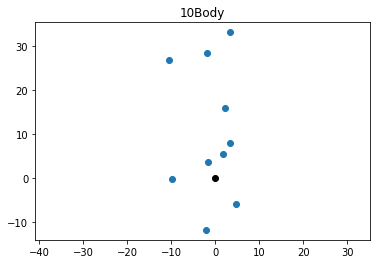

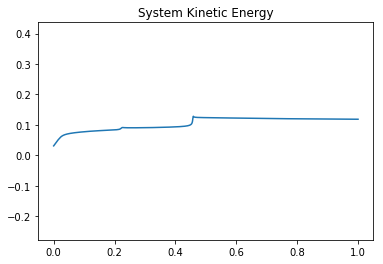

In [204]:
nbody(10,60000)

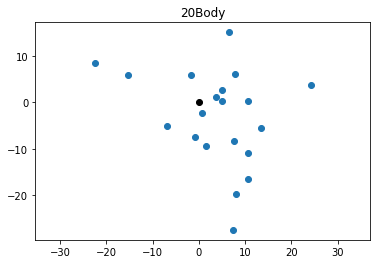

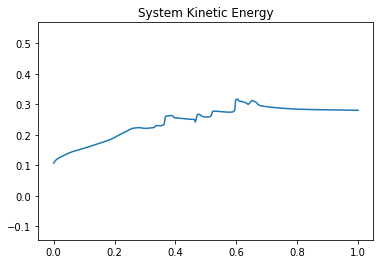

In [202]:
nbody(20,50000)

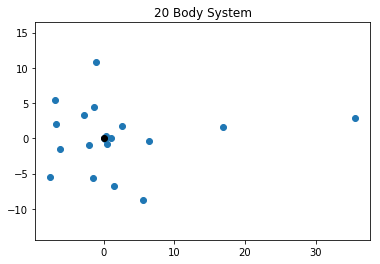

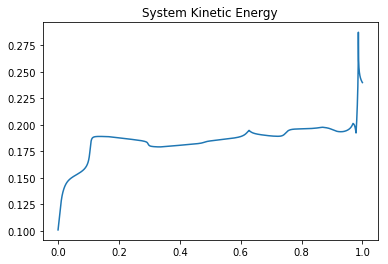

In [5]:
nbody(20,30000)

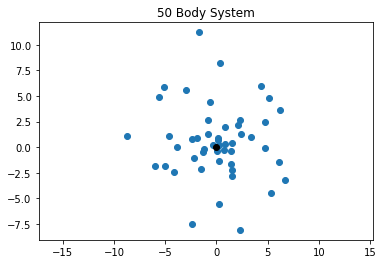

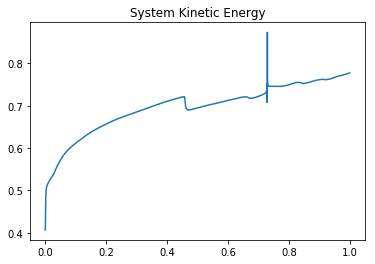

In [206]:
nbody(50,10000)

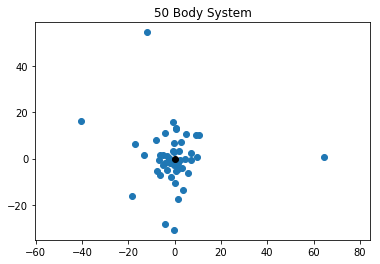

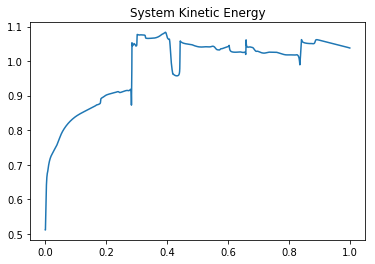

In [8]:
nbody(50,25000)